1) The key factor that allows an idea to be tested statistically is whether it can be measured or quantified
   The null hypothesis asserts that there is no effect between variables.
   A good null hypothesis is specific, testable, and refutable.
   The alternative hypothesis suggests that there is an effect between variables.

2)xᵢ: These are the individual data points in sample.
  x̄ (sample mean): This is the average of the sample data points, which is a statistic describing the sample.
  μ (population mean): This is the average for the entire population, which is a parameter.
  μ₀: This represents the hypothesized population mean in the null hypothesis.

the sentence means that we calculate things like the sample mean (x̄) from the sample data, our test result is ultimately about the population mean (μ) we are testing whether the population mean is different from the hypothesized value (μ₀), not just describing our sample.

3) We assume there is no effect or no difference, If the p-value is very small, it suggests that our data is unlikely to occur if the null hypothesis were true, leading us to consider rejecting the null hypothesis.

4) The data we observed would be very unlikely to occur if the null hypothesis were true. The p-value represents the probability of getting our observed results, or more extreme ones, assuming that the null hypothesis is correct.
 The smaller the p-value, the more surprising the data becomes under the assumption that the null hypothesis is true, leading us to question or reject the null hypothesis.

5) xi: Represents each couple’s head tilt (right = 1, left = 0).
   x̄ : The proportion of couples that tilted right in the sample.
   μ0: The null hypothesis mean, which assumes a 50% probability of tilting right, so μ0=0.5
   μ: The observed proportion of couples tilting right μ=80/124
We will simulate many random head tilts (i.e., coin flips) for 124 couples to see how often we get a proportion of couples tilting right as extreme as, or more extreme than, the observed 64.5%.

In [1]:
import numpy as np

# Set the parameters
n_simulations = 10000  # Number of simulations
n_couples = 124        # Total number of couples
right_tilts_observed = 80  # Observed number of right tilts (64.5%)

# Simulate flipping coins for 124 couples in each of 10,000 simulations
# A fair coin (p=0.5 for right tilt) is flipped for each couple
simulations = np.random.binomial(n=n_couples, p=0.5, size=n_simulations)

# Calculate the proportion of simulations where the number of right tilts is >= 80
p_value = np.mean(simulations >= right_tilts_observed)

p_value

0.0001

The simulated p-value is 0.0001. This means that under the null hypothesis (that head tilts are random with a 50/50 probability), the probability of observing 80 or more right tilts out of 124 couples is only 0.01%.

we can reject the null hypothesis with high confidence.

6)
A p-value can never definitively prove that the null hypothesis is true or false. Instead, it measures how compatible the observed data is with the null hypothesis. A small p-value suggests that the observed data is unlikely under the null hypothesis, but it doesn’t prove that the null hypothesis is false—it simply provides evidence to reject it.

Proving Fido’s innocence: A p-value cannot definitively prove Fido is innocent. Even if the p-value is large , it doesn’t prove the null hypothesis; it just means there's insufficient evidence to reject it.
Proving Fido’s guilt : A small p-value suggests strong evidence against Fido’s innocence, but it doesn’t prove guilt. There’s always a chance the result is due to random variation.

No p-value, no matter how low or high, proves anything with certainty.

7)
Two-Sided Test: This test checks for deviations in either direction from the null hypothesis. For example, if we are testing a vaccine's effectiveness, a two-sided test would check whether the effectiveness is either greater than or less than the hypothesized value (e.g., 50% effectiveness).
One-Sided Test: This test checks for deviation in one specific direction from the null hypothesis. For the vaccine example, a one-sided test would only check if the effectiveness is greater than the hypothesized value, or less than the hypothesized value, but not both.

In [2]:
# Assuming we already have the test statistic and p-value for a two-tailed test
from scipy import stats

# Example: test statistic and degrees of freedom (or sample size)
test_statistic = 2.1  # calculated from data
df = 100  # degrees of freedom or sample size

# Two-tailed p-value
p_value_two_sided = 2 * (1 - stats.t.cdf(abs(test_statistic), df))

# For a one-sided test, remove the factor of 2
p_value_one_sided = 1 - stats.t.cdf(test_statistic, df)  # For testing if result is greater than hypothesized value

# If testing for "less than", use:
# p_value_one_sided = stats.t.cdf(test_statistic, df)

In the one-sided test, you are testing for deviation in a specific direction. For example, you might test whether the vaccine effectiveness is greater than 50%. You’re not interested in testing whether it's less than 50%.
The p-value from a one-sided test will be smaller than that from a two-sided test, as you're only looking at one side of the distribution, which reduces the area you’re comparing to.

8)
Experiment Data: 80 STA130 students participated, and 49 correctly identified whether milk or tea was poured first.
->Our sample size is much larger: 80 students instead of 8.
->The original population parameter was personalized to Dr. Bristol’s ability, whereas in this case, the parameter represents a general ability of a student population.
H₀= The proportion of students who can correctly identify the order of pouring is 0.5
Hₐ= The proportion of students who can correctly identify the order of pouring is greater than 0.5

In [3]:
import scipy.stats as stats
import numpy as np

# Parameters
p_hat = 49 / 80  # Observed proportion
p_0 = 0.5        # Null hypothesis proportion
n = 80           # Sample size

# Calculate the z-score
z = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

# Calculate the one-tailed p-value
p_value = 1 - stats.norm.cdf(z)

z, p_value

(2.0124611797498115, 0.022085672454221217)

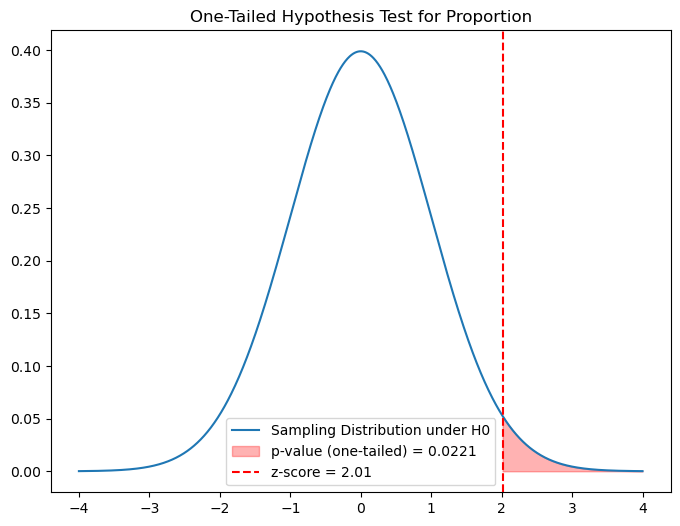

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate values for the normal curve
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(x, y, label='Sampling Distribution under H0')
plt.fill_between(x, y, where=(x >= z), color='red', alpha=0.3, label=f'p-value (one-tailed) = {p_value:.4f}')
plt.axvline(z, color='red', linestyle='--', label=f'z-score = {z:.2f}')
plt.title('One-Tailed Hypothesis Test for Proportion')
plt.legend()
plt.show()


Z-Score: The computed z-score tells us how many standard deviations the observed sample proportion (0.6125) is from the null hypothesis proportion (0.5).
P-Value: The p-value indicates the probability of observing a result as extreme or more extreme than 49 correct guesses, assuming the null hypothesis is true (random guessing).

Based on the p-value:

If the p-value is small (<0.05<0.05), we reject H0	
and conclude that STA130 students have an ability to distinguish tea order better than random guessing.
If the p-value is large (≥0.05≥0.05), we fail to reject H0	
 , suggesting there is no evidence to support that students performed better than random guessing.
This conclusion should be interpreted carefully, considering that rejecting H0	
  does not prove ability, but provides evidence in favor of it.